In [59]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse.linalg import inv
from scipy.sparse import csc_matrix
from BCG_CG_ichol import BCG, conjugate_grad, ichol
%matplotlib inline

In [60]:
x_range = np.linspace(0, 2*np.pi, 101)
u_true = np.sin(x_range).reshape(101, 1)

In [61]:
A = np.diag(-np.ones(100), k=-1)+np.diag(2*np.ones(101), k=0)+np.diag(-np.ones(100), k=1)
A = 2*np.pi*A/101

In [62]:
L = ichol(A)
L = csc_matrix(L)
P = L.dot(L.T)
print('Norm(P-A)', np.linalg.norm(P.toarray()-A)) 
invA = inv(csc_matrix(A)).toarray()
invP = inv(P).toarray()
eye_mat = np.eye(101)
f = A.dot(u_true)

Norm(P-A) 1.2907088757326182e-16


In [63]:
bcg = BCG(A, f, np.zeros((101, 1)), invP, 10**(-4), 101)
u_res_P, _, _, point_est_P, _ = bcg.bcg(u_true)

bcg = BCG(A, f, np.zeros((101, 1)), invA, 10**(-4), 101)
u_res_A, _, _, point_est_A, _ = bcg.bcg(u_true)

bcg = BCG(A, f, np.zeros((101, 1)), eye_mat, 10**(-4), 101)
u_res_I, _, _, point_est_I, _ = bcg.bcg(u_true)

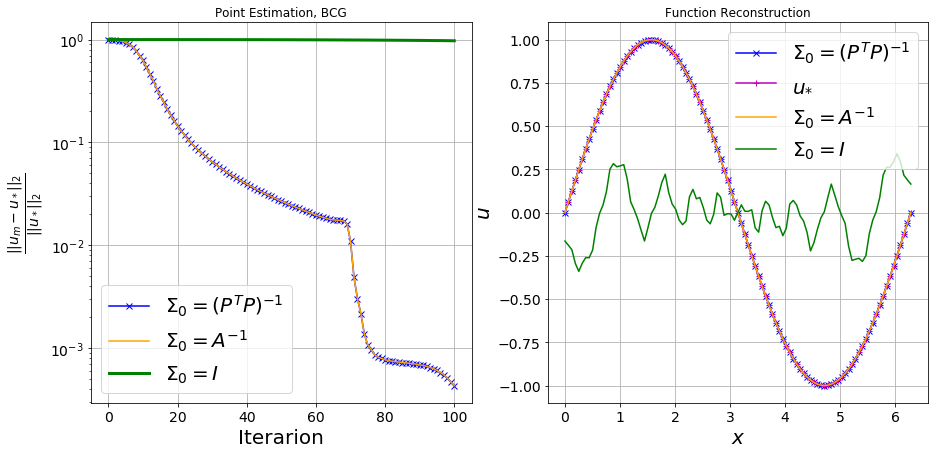

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))
ax[0].semilogy(point_est_P, color = 'blue', label=r'$\Sigma_0 = (P^TP)^{-1}$', marker='x')
ax[0].semilogy(point_est_A, color = 'orange', label=r'$\Sigma_0 = A^{-1}$')
ax[0].semilogy(point_est_I, color = 'green', label=r'$\Sigma_0 = I$', linewidth=3)
ax[0].set_ylabel(r'$\frac{|| u_m - u_*||_2}{|| u_*||_2}$', fontsize=20);
ax[0].set_xlabel('Iterarion', fontsize=20);
ax[0].set_title('Point Estimation, BCG')
ax[0].grid(True)
ax[0].legend(fontsize = 20)


ax[1].plot(x_range, u_res_P, color = 'blue', label=r'$\Sigma_0 = (P^TP)^{-1}$', marker='x')
ax[1].plot(x_range, u_res_P, color = 'm', label=r'$u_{*}$', marker='+')
ax[1].plot(x_range, u_res_A, color = 'orange', label=r'$\Sigma_0 = A^{-1}$')
ax[1].plot(x_range, u_res_I, color = 'green', label=r'$\Sigma_0 = I$')
ax[1].set_ylabel(r'$u$', fontsize=20);
ax[1].set_xlabel(r'$x$', fontsize=20);
ax[1].set_title('Function Reconstruction')
ax[1].grid(True)
ax[1].legend(fontsize = 20)

for i in range(2):
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(14)

#plt.savefig('Poisson', dpi=300)